### Import of symbolic mathematic library

In [159]:
import sympy as sp
import numpy as np

### Import of plot utilities

In [158]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

### Define Useless methods

##### Gradiant function

In [12]:
def gradiant(function, argsf):
    Lf = []
    for var in argsf:
        Lf.append(function.diff(var))
    return sp.Matrix(Lf)

##### Hessian function

In [13]:
def hessian(function, argsf):
    H = []
    for i in argsf:
        line = []
        for j in argsf:
            line.append(function.diff(j).diff(i))
        H.append(line)
    return sp.Matrix(H)

##### Normalize function

In [4]:
def normalize(vector):
    vector = sp.Matrix(vector)
    norm = 0
    for x in vector:
        norm += x**2
    return sp.sqrt(norm)

### FixedDepth Function

In [168]:
def fixedDepht(function, coord, s, init_point, e = 10**(-5), iter=100 ):
    Lf = gradient(function,coord) #calcul gradiant of the function
    X = sp.Matrix(init_point) #convert init_point in matrix n*m 
    
    k = 0
    while (k < iter):
        X_K = [] #X[k]
        for i in range(len(coord)):
            X_K.append((coord[i], X[i])) #link coord to init value to substitude in Gradiant matrix
        
        grad = [] #Lf(X[k])
        for expr in Lf:
            grad.append(expr.subs(X_K)) #substitude values in gradiant matrix
        grad = sp.Matrix(grad) # convert the result in matrix
        
        if ((normalize(grad)) < e): #break if ||lf(X[k])|| < precision
            break
            
        X = sp.Matrix(X - s*grad) #calcul the X[k+1] = X[k]-s*Lf(X[k])
        ax.scatter(X[0],X[1],f(X[0],X[1]), marker="o", color="#00FF00")
        plt.draw()
        plt.pause(0.05)
        k += 1
        
    return X #return the last X

#### Test it on a function

##### define own function

In [78]:
def f(x,y):
    return 4*(x**2)+6*(y**2)+(6*x*y)+(3*x)+(4*y)+6

###### Define own symbols

In [166]:
x, y = sp.symbols('x, y')

##### plot config

Text(0.5, 0, 'parameter 2 : y')

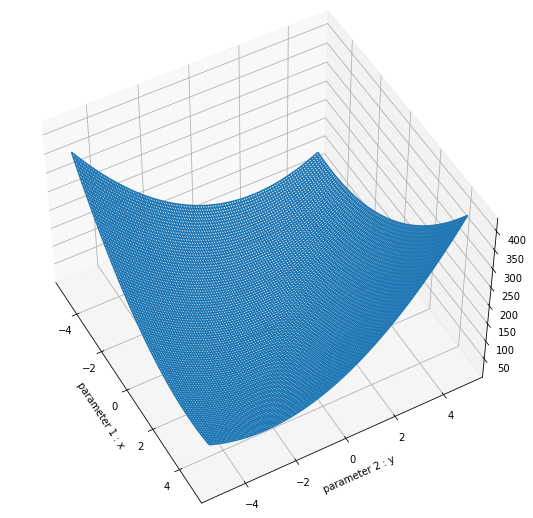

In [165]:
fig = plt.figure()
fig.set_size_inches(9, 7, forward=True)
ax = Axes3D(fig,azim=-29, elev=49)
a = np.arange(-5,5,0.1)
b = np.arange(-5,5,0.1)
A,B = np.meshgrid(a,b)
C = f(A,B)
ax.plot_wireframe(X,Y,Z,rstride=1, cstride=1)
plt.xlabel("parameter 1 : x")
plt.ylabel("parameter 2 : y")

###### calcul the gradiant

In [80]:
Grad = gradiant(f(x,y),(x,y))

In [82]:
Grad

Matrix([
[ 8*x + 6*y + 3],
[6*x + 12*y + 4]])

In [83]:
H = hessian(f(x,y),(x,y))

In [84]:
H

Matrix([
[8,  6],
[6, 12]])

In [179]:
FD = fixedDepht(f(x,y),(x,y),0.1,[0,0],10**(-15),2)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [86]:
FD

Matrix([
[-0.12],
[-0.14]])

### OptimalDepth Function

##### calcul sk

In [137]:
def sk(xk,dk,coord,function):
    s = sp.symbols("s") # define our symbol arg
    X = sp.Matrix(xk - s*dk) # calcul Xk+sdk to get our Xk+1
    #print(function)
    #print(X)
    X_K = [] #X[k]
    for i in range(len(coord)):
        X_K.append((coord[i], X[i]))
    #print(X_K)
    phi = function.subs(X_K)
    #print(phi)
    #phi = sp.simplify(phi)
    #print(phi)
    grad = gradiant(phi,('s'))
    #print(grad)
    solution = []
    for expr in grad:
        solution.append(sp.solve(sp.Eq(expr,0)))
    #print(type(solution[0][0]))
    return sp.N(solution[0][0])
    
    
    
    

In [148]:
def print_details(s,k,function, norm, X, coord):
    X_K = [] #X[k]
    info = ""
    for i in range(len(coord)):
        info+= str(coord[i])+":  "+str(X[i]) +" "
        X_K.append((coord[i], X[i]))
    print("""k: {}   f(xk, yk): {}  ||∇f(xk,yk)||: {} sk: {}  {}   """.format(k, function.subs(X_K), norm, s,info))

In [140]:
def optimalDepht(function, coord, init_point, e = 10**(-5), iter=100 ):
    Lf = gradient(function,coord) #calcul gradiant of the function
    X = sp.Matrix(init_point) #convert init_point in matrix n*m 
    
    k = 0
    while (k < iter):
        X_K = [] #X[k]
        for i in range(len(coord)):
            X_K.append((coord[i], X[i])) #link coord to init value to substitude in Gradiant matrix
        
        grad = [] #Lf(X[k])
        for expr in Lf:
            grad.append(expr.subs(X_K)) #substitude values in gradiant matrix
        grad = sp.Matrix(grad) # convert the result in matrix
        
        if ((normalize(grad)) < e): #break if ||lf(X[k])|| < precision
            break
            
        # determine sk
        s = sk(X,grad,coord,function)
        #print("OKK")
        #break
        X = sp.Matrix(X - s*grad) #calcul the X[k+1] = X[k]-s*Lf(X[k])
        ax.scatter(X[0],X[1],f(X[0],X[1]), marker="o", color="#00FF00")
        plt.draw()
        plt.pause(0.05)
        print_details(s,k,function, normalize(grad), X, coord)
        k += 1
        
    return X #return the last X

In [149]:
optimalDepht(f(x,y),(x,y),[0,0],10**(-15),2)

k: 0   f(xk, yk): 5.23406862745098  ||∇f(xk,yk)||: 5 sk: 0.0612745098039216  x:  -0.183823529411765 y:  -0.245098039215686    
k: 1   f(xk, yk): 5.23333403853869  ||∇f(xk,yk)||: 0.0735294117647057 sk: 0.271739130434784  x:  -0.199808184143223 y:  -0.233109548167093    


Matrix([
[-0.199808184143223],
[-0.233109548167093]])

###### penser a tester avec les fonction appartenant à R^n, n>=3

### Newton Local

#### newton direction function

In [176]:
def newtonDirection(function, coord):
    Hf = hessian(function,coord) #calcul the hessian
    Lf = gradient(function,coord) #calcul the gradiant
    
    V = [] #variables for the linear system Hf*U = -Lf
    for i in range(len(coord)):
        V.append(sp.symbols("v"+str(i))) #variables création in dimension
    V = sp.Matrix(V)
    
    solution = sp.solve(Hf*V + Lf, V) #solve linear system Hf*U = -Lf 
    
    D = [] #newton direction vector
    for v in V:
        D.append(solution[v]) #pass solution of linear system solving
    D = sp.Matrix(D)

    return D #return Newton Direction

In [155]:
sp.solve(H*sp.Matrix([sp.symbols("u"),sp.symbols("v")])+Grad,sp.Matrix([sp.symbols("u"),sp.symbols("v")]))

{u: -x - 1/5, v: -y - 7/30}

#### newton local function

In [174]:
def newtonLocal(function, coord, point, e = 10**(-5)):
    Lf = gradient(function,coord) #calcul of gradiant
    DNf = newtonDirection(function,coord) #calcul of newton direction
    X = sp.Matrix(point) #init start point convertion into matrix
    

    while (True):# first break condition
        X_K = [] #X[k]
        for i in range(len(coord)):
            X_K.append((coord[i], X[i])) #substitute values coordonate 
        
        grad = [] #Lf(X[k])
        for expr in Lf:
            grad.append(expr.subs(X_K)) #calcul des coordonees de Lf(X[k])
        grad = sp.Matrix(grad)
        
        if ((normalize(grad)) < e): #break if ||lf(X[k])|| < precision
            break
            
        d = [] #DNf(X[k])
        for expr in DNf:
            d.append(expr.subs(X_K)) #calcul des final newton direction value by biding values of X_K
        d = sp.Matrix(d)

        X = sp.Matrix(X + d) #calcul of X[k+1] = Xk+Dk with fixed depth equals to 1.
        ax.scatter(X[0],X[1],f(X[0],X[1]), marker="o", color="#00FF00")
        plt.draw()
        plt.pause(0.05)
        
    return X #retour du dernier X[k]

In [177]:
newtonLocal(f(x,y),(x,y),[0,0],10**(-15))

<Figure size 432x288 with 0 Axes>

Matrix([
[ -1/5],
[-7/30]])

### Gauss Newton

In [ ]:
def gaussLocal(function, coord, point, e = 10**(-5)):
    Lf = gradient(function,coord) #calcul of gradiant
    DNf = newtonDirection(function,coord) #calcul of newton direction
    X = sp.Matrix(point) #init start point convertion into matrix
    

    while (True):# first break condition
        X_K = [] #X[k]
        for i in range(len(coord)):
            X_K.append((coord[i], X[i])) #substitute values coordonate 
        
        grad = [] #Lf(X[k])
        for expr in Lf:
            grad.append(expr.subs(X_K)) #calcul des coordonees de Lf(X[k])
        grad = sp.Matrix(grad)
        
        if ((normalize(grad)) < e): #break if ||lf(X[k])|| < precision
            break
            
        d = [] #DNf(X[k])
        for expr in DNf:
            d.append(expr.subs(X_K)) #calcul des final newton direction value by biding values of X_K
        d = sp.Matrix(d)

        X = sp.Matrix(X + d) #calcul of X[k+1] = Xk+Dk with fixed depth equals to 1.
        ax.scatter(X[0],X[1],f(X[0],X[1]), marker="o", color="#00FF00")
        plt.draw()
        plt.pause(0.05)
        